In [16]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

import sys
sys.path.insert(0, 'C:/Users/MyPC/Desktop/git/AVATAR_motionMap')
import FileManager.csvload as acl
import after_subtle.module as asmod
import project.Broad.model1.params as params

DIR = {
    'gria3': params.DIR_gria3,
    'setd1a': params.DIR_setd1a,
    'gria3_wt': params.DIR_gria3_wt,
    'gria3_mut': params.DIR_gria3_mut,
    'setd1a_wt': params.DIR_setd1a_wt,
    'setd1a_het': params.DIR_setd1a_het
    }   # directory of the data extracted from the subtle

SAVE_DIR_LIST = {
    'gria3': params.SAVE_DIR_gria3,
    'setd1a': params.SAVE_DIR_setd1a,
    'gria3_wt': params.SAVE_DIR_gria3,
    'gria3_mut': params.SAVE_DIR_gria3,
    'setd1a_wt': params.SAVE_DIR_setd1a,
    'setd1a_het': params.SAVE_DIR_setd1a
    }   # directory to save the analysis from after_subtle

COORDS_DIR = {
    'gria3':params.COORDS_DIR_gria3, 
    'setd1a':params.COORDS_DIR_setd1a,
    'gria3_wt':params.COORDS_DIR_gria3,
    'gria3_mut':params.COORDS_DIR_gria3,
    'setd1a_wt':params.COORDS_DIR_setd1a,
    'setd1a_het':params.COORDS_DIR_setd1a
    }   # directory of the coordinates of groups

# calculate the density map
analysis_names = ['gria3', 'setd1a', 'gria3_wt', 'gria3_mut', 'setd1a_wt', 'setd1a_het']

# color map
red_color = np.array([(0.7, 0, 0)])
red_color = red_color.reshape(1, 3)
complementary_color = mcolors.rgb_to_hsv(red_color)
complementary_color[0, 0] = (complementary_color[0, 0] + 0.5) % 1.0
complementary_color = mcolors.hsv_to_rgb(complementary_color)

cmap_complementary = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, 'white'), (1, complementary_color)])
cmap_both = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, complementary_color), (0.5, 'white'), (1, red_color)])


Draw density map in a group

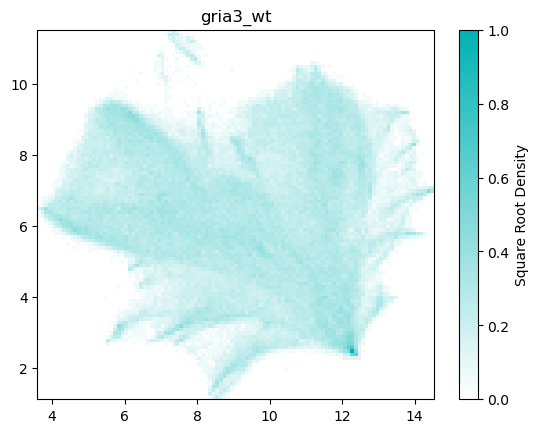

In [23]:
Draw_name = 'gria3_wt'
wt_yes = 1  # 1: wt, 0: ko. for color code

# use glob to find all subdirectories containing the desired files
Draw_DIR = DIR[Draw_name]
SAVE_DIR = SAVE_DIR_LIST[Draw_name]
folder_list = acl.get_csv_paths(Draw_DIR)

# Compute the density map
cmap = cmap_complementary

if wt_yes == 1:
    asmod.density_map(folder_list, cmap=cmap)
else:
    asmod.density_map(folder_list)

plt.title(Draw_name)
plt.savefig(os.path.join(SAVE_DIR, Draw_name)+'_density_map.pdf', transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, Draw_name)+'_density_map.png', transparent=False, dpi=300)
plt.show()

Differential density map for two groups (ex. WT vs. KO)

['C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model1\\results_testset1\\Setd1a\\record_2023-05-16-110829.mp4.txt', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model1\\results_testset1\\Setd1a\\record_2023-06-12-122754.mp4.txt', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model1\\results_testset1\\Setd1a\\record_2023-06-12-130347.mp4.txt', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model1\\results_testset1\\Setd1a\\record_2023-06-29-115334.mp4.txt', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model1\\results_testset1\\Setd1a\\record_2023-07-06-105455.mp4.txt', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model1\\results_testset1\\Setd1a\\record_2023-07-06-112406.mp4.txt']
['C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model1\\results_testset1\\Setd1a\\record_2023-05-16-101150.mp4.txt', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\Broad\\model1\\results_testset1\\S

c:\Users\MyPC\Desktop\git\SUBTLE_June\after_subtle\module.py:207: RuntimeWarning: invalid value encountered in sqrt
  dendiff_sqrt = np.where(dendiff >= 0, np.sqrt(dendiff), -np.sqrt(np.abs(dendiff)))


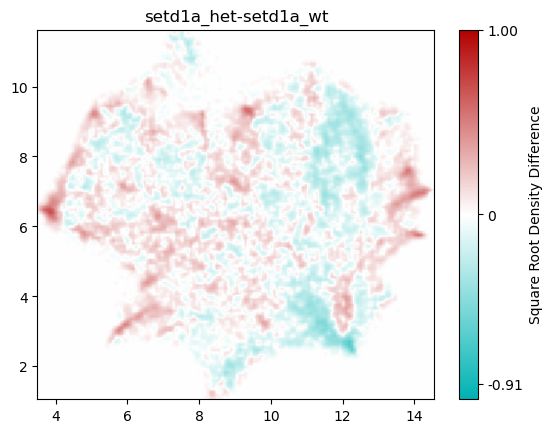

In [18]:
group1 = 'setd1a_het'
group2 = 'setd1a_wt'
SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1],'dendiff')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

##
pair_name = group1 + '-' + group2

# find all subdirectories containing the desired files for Group 1
DIR1 = DIR[group1]
group1_folder_list = acl.get_csv_paths(DIR1)
print(group1_folder_list)

# find all subdirectories containing the desired files for Group 2
DIR2 = DIR[group2]
group2_folder_list = acl.get_csv_paths(DIR2)
print(group2_folder_list)

# Define the colors
cmap = cmap_both

# Draw
asmod.draw_dendiff_sqrt(group1_folder_list, group2_folder_list, cmap=cmap, bin_size=0.08)
plt.title(pair_name)
plt.savefig(os.path.join(SAVE_DIR, pair_name) + '_norm.pdf', transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, pair_name) + '_norm.png', transparent=False, dpi=300)


Draw behavioral density heatmap for all groups

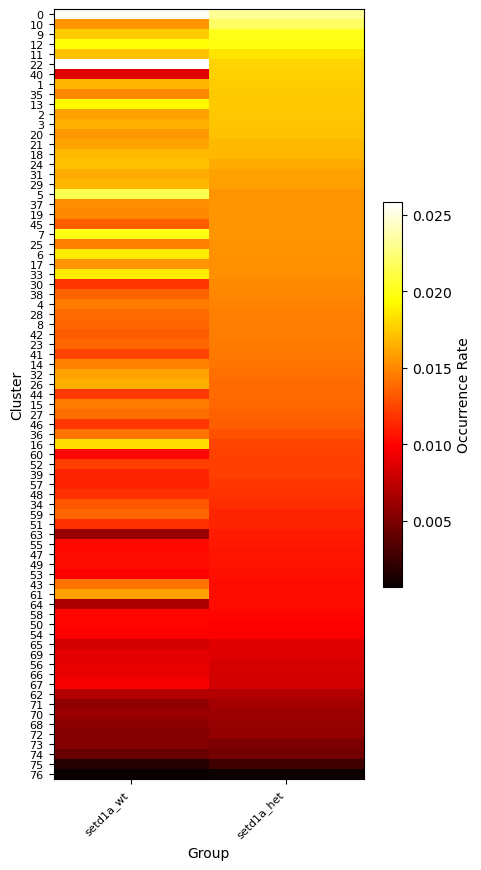

In [18]:
import after_subtle.module as asmod
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

subcluster_num = params.subcluster_num

group = 1
if group == 1:
    group1 = 'gria3_mut'
    group2 = 'gria3_wt'
else:
    group1 = 'setd1a_het'
    group2 = 'setd1a_wt'

SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1],'dendiff')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

##
# Define the directory
DIR1 = DIR[group1]
DIR2 = DIR[group2]
group1_folder_list = acl.get_csv_paths(DIR1)
group2_folder_list = acl.get_csv_paths(DIR2)

# calculate the density map
group_folder_lists = [group1_folder_list, group2_folder_list]
group_names = [group1, group2]
group_ref = [group2] # cluster aligned to the order of 'group_ref'

cluster_counts = asmod.compare_cluster_occurrence(group_folder_lists, group_names, subcluster_number=subcluster_num, target_groups=group_ref)

# Apply square root transformation
#cluster_counts_sqrt = np.sqrt(cluster_counts)

# grouped_clusters = [f"{i}-{i+2}" for i in range(0, len(cluster_counts), 3)]
cluster_counts = cluster_counts.iloc[:,:]

fig, ax = plt.subplots(figsize=(5, 10))  # Increase the figure size

im = ax.imshow(cluster_counts.values, cmap='hot', aspect='auto')
ax.set_xticks(range(len(cluster_counts.columns)))
ax.set_xticklabels(cluster_counts.columns, fontsize=8, rotation=45, ha='right')

# Adjust the spacing between the ticks on the y-axis
ax.set_yticks(range(len(cluster_counts.index)))
ax.set_yticklabels(cluster_counts.index, fontsize=8)  # Increase the font size for y-axis ticks
    
plt.xlabel('Group')
plt.ylabel('Cluster')
cbar = plt.colorbar(im, label='Occurrence Rate',shrink=0.5)

plt.savefig(os.path.join(SAVE_DIR, 'heatmap_cluster_occurrence.pdf'), transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, 'heatmap_cluster_occurrence.png'), transparent=False, dpi=300)

Run whole file in two groups

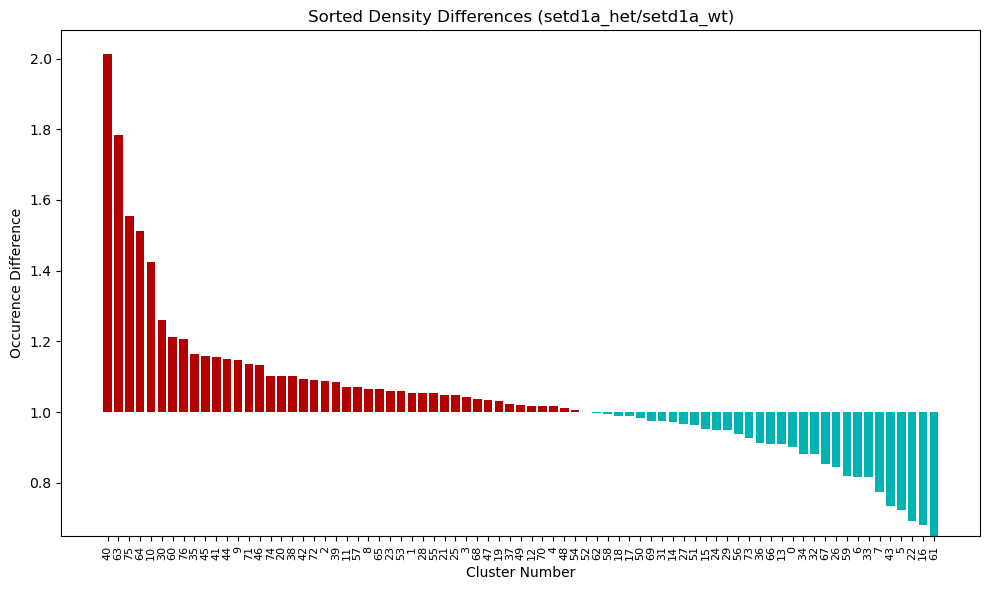

In [39]:
import after_subtle.module as asmod
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

subcluster_num = params.subcluster_num

group = 0
if group == 1:
    group1 = ['gria3_mut']
    group2 = ['gria3_wt']
else:
    group1 = ['setd1a_het']
    group2 = ['setd1a_wt']

SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1[0]],'dendiff')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

##
# calculate the density map
group1_folder_list = [acl.get_csv_paths(DIR[analysis_name]) for analysis_name in group1]
cluster_counts1 = asmod.compare_cluster_occurrence(group1_folder_list, group1, subcluster_number=subcluster_num)

group2_folder_list = [acl.get_csv_paths(DIR[analysis_name]) for analysis_name in group2]
cluster_counts2 = asmod.compare_cluster_occurrence(group2_folder_list, group2, subcluster_number=subcluster_num)

# Calculate the difference
#density_differences = cluster_counts1.iloc[:, 0] - cluster_counts2.iloc[:, 0]
density_differences = cluster_counts1.iloc[:, 0]/cluster_counts2.iloc[:, 0]
# Sort the density differences in descending order along with their indices
sorted_differences = density_differences.sort_values(ascending=False)

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
# Iterate through the sorted differences to create bars with different colors
for i, value in enumerate(sorted_differences.values):
    color = red_color if value >= 1 else complementary_color
    bottom_value = 1 if value >= 1 else value  # start from 1 if value >= 1 else start from value
    ax.bar(i, np.abs(value - 1), color=color, bottom=bottom_value)

# Set the x-axis tick labels as cluster numbers with a smaller font size
ax.set_xticks(range(len(sorted_differences)))
ax.set_xticklabels(sorted_differences.index, rotation=90, fontsize=8)  # Adjust the font size as needed

# Add labels and title
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Occurence Difference')
ax.set_title('Sorted Density Differences'+' ('+group1[0]+'/'+group2[0]+')')

# Adjust the spacing to prevent overlapping labels
fig.tight_layout()

plt.savefig(os.path.join(SAVE_DIR, group1[0]+'-'+group2[0]+'_bar_dendiff.pdf'), transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, group1[0]+'-'+group2[0]+'_bar_dendiff.png'), transparent=False, dpi=300)
plt.show()


Run whole files in a specific group

In [51]:
import after_subtle.module as asmod
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import sys
sys.path.insert(0, 'C:/Users/MyPC/Desktop/git/AVATAR_motionMap')
import FileManager.csvload as acl

group_name = 'setd1a_wt'
subcluster_number = 75
dur_thres = 5
pre = 10
post = 20

folder_list = acl.get_csv_paths(DIR[group_name]) # directory of the data extracted from the subtle
coords_folder = COORDS_DIR[group_name] # directory of the coordinates of groups
SAVE_DIR = os.path.join(SAVE_DIR_LIST[group_name],'behaviors_in_subcluster')  # directory to save the analysis from after_subtle
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

# extract coordinates from a speicifc subcluster
frames = []
coords = pd.DataFrame()
for folder in folder_list:
    subcluster_file = os.path.join(folder, 'subclusters.csv')
    if os.path.isfile(subcluster_file):
        subclusters = pd.read_csv(subcluster_file, header=None)

        folder_name = os.path.basename(folder)
        coords_file = os.path.join(coords_folder, folder_name + '.csv')
        if os.path.isfile(coords_file):
            coords_data = pd.read_csv(coords_file, header=None)
            frames_in_subcluster, coords_in_subcluster = asmod.find_consecutive_groups(subclusters, coords_data, subcluster_number, dur_thres, pre=pre, post=post)

            frames.extend(frames_in_subcluster)
            coords = pd.concat([coords, coords_in_subcluster])

#coords.to_csv(DIR[group_name]+'/'+group_name+'_coords_subcluster'+str(subcluster_number)+'.csv', header=None, index=None)
coords.to_csv(os.path.join(SAVE_DIR, group_name+'_subcluster'+str(subcluster_number)+'.csv'), header=None, index=None)
